In [15]:
# Boston House Prediction Using Linear Regression and Deep Neural Network

In [10]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2 , seed=42)

In [3]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

In [4]:
model.compile(optimizer='adam', loss='mse', metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])

In [5]:
history = model.fit(x_train, y_train, epochs=20)
print("Model Metric Names (Defined in model.compile): ",model.metrics_names)

Epoch 1/20
13/13 [==============================] - 1s 1ms/step - loss: 175.1747 - mae: 10.0494 - root_mean_squared_error: 13.2354
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 93.3317 - mae: 7.3180 - root_mean_squared_error: 9.6608
Epoch 3/20
13/13 [==============================] - 0s 1ms/step - loss: 61.1615 - mae: 5.7247 - root_mean_squared_error: 7.8206
Epoch 4/20
13/13 [==============================] - 0s 1ms/step - loss: 56.4256 - mae: 5.4592 - root_mean_squared_error: 7.5117
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 50.0309 - mae: 5.1478 - root_mean_squared_error: 7.0733
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 49.4394 - mae: 5.0494 - root_mean_squared_error: 7.0313
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 45.9047 - mae: 5.0683 - root_mean_squared_error: 6.7753
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 49.7391 - mae: 5.0236 - root_

In [6]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)

# Displaying the results
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i], ": ", results[i])

print("Generate predictions for all samples")
predictions = model.predict(x_test[:len(x_test)]) 

# Displaying the predicted and actual values
for i in range(len(predictions)):
    print("Predicted value: ", predictions[i][0], "|", " Actual value: ", y_test[i])


Evaluate on test data
4/4 [==============================] - 0s 2ms/step - loss: 40.9951 - mae: 4.1816 - root_mean_squared_error: 6.4027
loss :  40.995147705078125
mae :  4.181572437286377
root_mean_squared_error :  6.402745246887207
Generate predictions for all samples
4/4 [==============================] - 0s 1ms/step
Predicted value:  19.809687 |  Actual value:  22.4
Predicted value:  24.064949 |  Actual value:  28.6
Predicted value:  20.54927 |  Actual value:  19.5
Predicted value:  23.975384 |  Actual value:  24.8
Predicted value:  19.428528 |  Actual value:  24.5
Predicted value:  19.283487 |  Actual value:  21.4
Predicted value:  25.837158 |  Actual value:  33.1
Predicted value:  25.836655 |  Actual value:  22.9
Predicted value:  26.627987 |  Actual value:  20.7
Predicted value:  25.77106 |  Actual value:  24.1
Predicted value:  26.406334 |  Actual value:  50.0
Predicted value:  22.44661 |  Actual value:  24.7
Predicted value:  23.929132 |  Actual value:  28.7
Predicted value:  

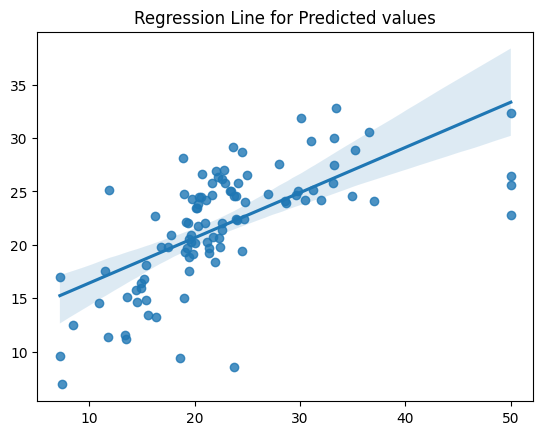

In [9]:
sns.regplot(x=y_test, y=predictions)
plt.title("Regression Line for Predicted values")
plt.show()

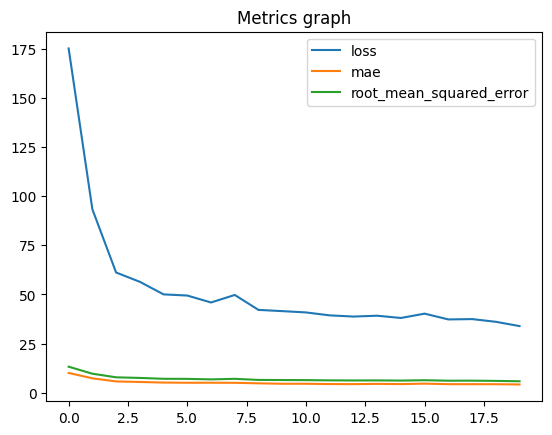

In [16]:
pd.DataFrame(history.history).plot()
plt.title("Metrics graph")
plt.show()